<a href="https://colab.research.google.com/github/BRIJNANDA1979/Segmenting-Kelp-Forests-/blob/main/Version_2_K_Means_CVI_NDVI_MNDWI_for_Kelp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Use 5 out of 7 bands(exclude 6 and 7 as these are for cloud and DEM)..
find CVI   NDVI   and MNDWI...


In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
test_path = '/content/drive/MyDrive/test_satellite'
train_path = '/content/drive/MyDrive/train_kelp'

In [27]:
import os

In [28]:
test_files_list = os.listdir(test_path)
train_files_list = os.listdir(train_path)

In [29]:
for i in train_files_list:
  s = i.split('_')
  ss = s[0] +'_satellite.tif'
  if ss in test_files_list:
    print(ss)
  #####  Test and train has nothing in common

In [30]:
test_files_list[0:2]

['HP480632_satellite.tif', 'HP504630_satellite.tif']

In [31]:
pip install rasterio

In [32]:
import rasterio
import matplotlib.pyplot as pyplot
from rasterio.plot import show     ####  https://rasterio.readthedocs.io/en/stable/topics/plotting.html

Rasterio also provides rasterio.plot.show() to perform common tasks such as displaying multi-band images as RGB and labeling the axes with proper geo-referenced extents.

Band Order and Detail
1.SWIR (Shortwave Infrared) (int): The SWIR band is useful for distinguishing between different types of vegetation, as well as for detecting moisture content in soil and vegetation. When combined with the green band, it can be used to calculate the Modified Normalized Difference Water Index (MNDWI). The MNDWI is especially useful for identifying the intertidal zone, which can be mistaken for kelp canopy at low tides.

2.NIR (Near-Infrared) (int): The NIR band is essential for vegetation studies, as healthy vegetation reflects a significant amount of NIR light. It is often used to calculate the NDVI (Normalized Difference Vegetation Index), which has been used in past efforts to estimate kelp canopy.

3.Red (int): The red band captures red light from the visible spectrum.

4.Green (int): The green band captures green light from the visible spectrum.

5.Blue (int): The blue band captures blue light from the visible spectrum.

6.Cloud Mask (int): A binary mask identifying the presence (1) or absence (0) of clouds.

7.Digital Elevation Map (int): The Digital Elevation Model (DEM) is generated from ASTER data and can be used to generate a land mask. Values represent meters above sea-level and start at 0.

In [33]:
from rasterio.plot import show_hist

/usr/local/lib/python3.10/dist-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


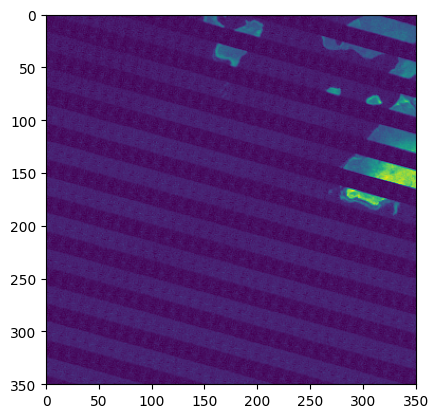

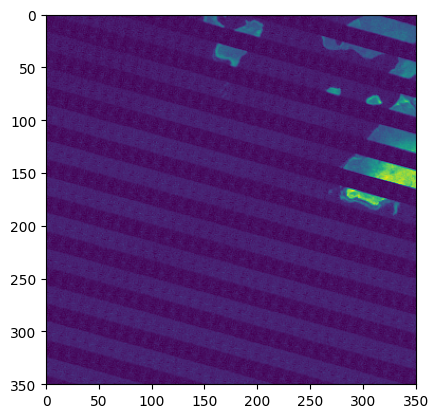

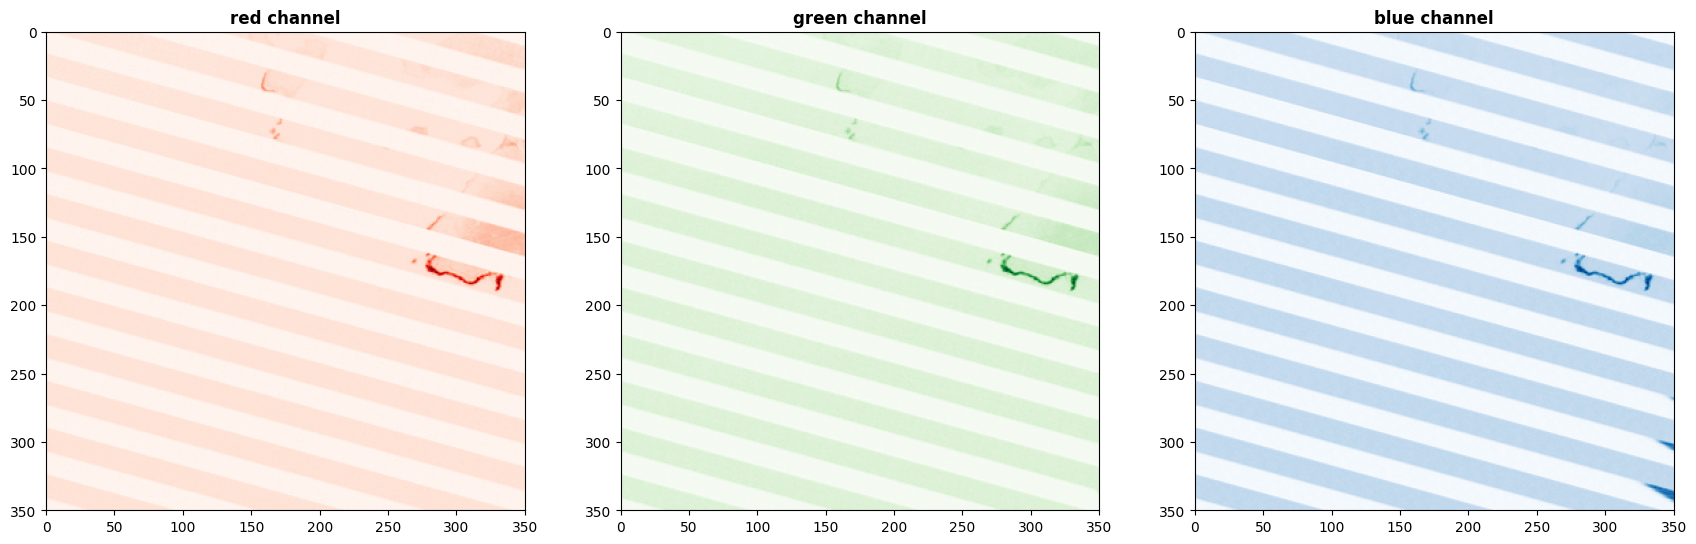

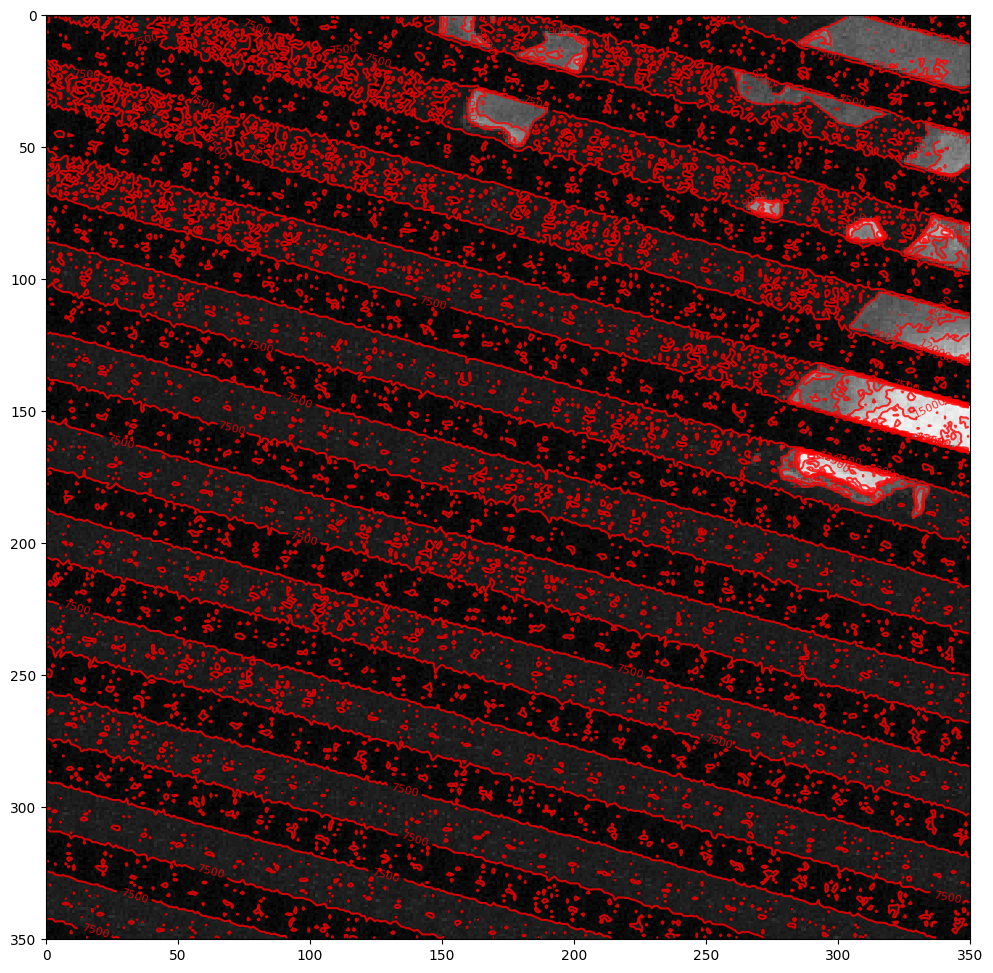

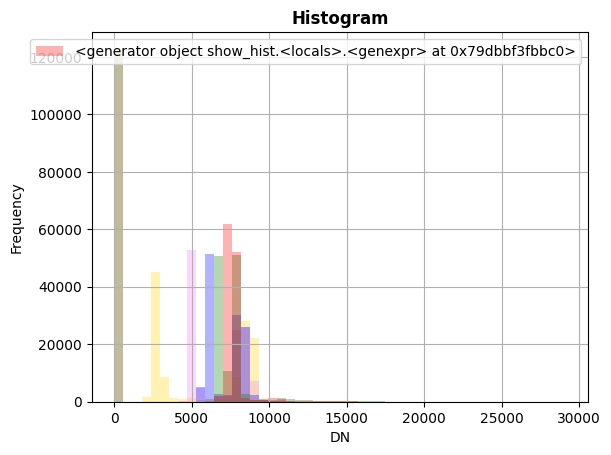

{'driver': 'GTiff', 'dtype': 'int32', 'nodata': None, 'width': 350, 'height': 350, 'count': 7, 'crs': None, 'transform': Affine(1.0, 0.0, 0.0,
       0.0, 1.0, 0.0)}
(350, 350)
(350, 350)
(350, 350)
(350, 350)
(350, 350)


In [34]:
for i in test_files_list:                                  ##### Analysing one Satellitr image data to data_array with 5 BANDS
  with rasterio.open(test_path+'/'+i) as src:
    show(src)
    show(src.read(1), transform=src.transform)
    fig, (axr, axg, axb) = pyplot.subplots(1,3, figsize=(21,7))
    show((src, 3), ax=axr, cmap='Reds', title='red channel')
    show((src, 4), ax=axg, cmap='Greens', title='green channel')
    show((src, 5), ax=axb, cmap='Blues', title='blue channel')
    fig, ax = pyplot.subplots(1, figsize=(12, 12))
    show((src, 1), cmap='Greys_r', interpolation='none', ax=ax)   #### SWIR band
    show((src, 1), contour=True, ax=ax)
    pyplot.show()

    show_hist(
    src, bins=50, lw=0.0, stacked=False, alpha=0.3,
    histtype='stepfilled', title="Histogram")
    print(src.meta)
    for band in range(1,6):                    ###########   Exclude 6 and 7
      data_array = src.read(band)
      print(data_array.shape)
  break


In [35]:
XX = []
for i in test_files_list:
  with rasterio.open(test_path+'/'+i) as src:
    for band in range(1,6):                    ###########   Exclude 6 and 7
      datarray = src.read(band)
      XX.append(datarray)




In [36]:
len(test_files_list)

1426

In [37]:
import numpy as np

In [38]:
XXX = np.array(XX)

In [39]:
XXX.shape

(7130, 350, 350)

In [40]:
pip install earthpy

In [41]:
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

In [42]:
# Landsat 8 red band is band 4 at [3]
# Landsat 8 near-infrared band is band 5 at [4]
SWIR = XXX[0]
NIR = XXX[1]
RED = XXX[2]
GREEN = XXX[3]
BLUE = XXX[4]
ndvi = es.normalized_diff(NIR,RED)
mndwi = es.normalized_diff(GREEN,SWIR)
CVI = es.normalized_diff(NIR,GREEN)               ########  EVI = G * ((NIR - R) / (NIR + C1 * R – C2 * B + L))
EVI = GREEN *((NIR -RED)/(NIR + 6*RED - 7.5*BLUE + 1))

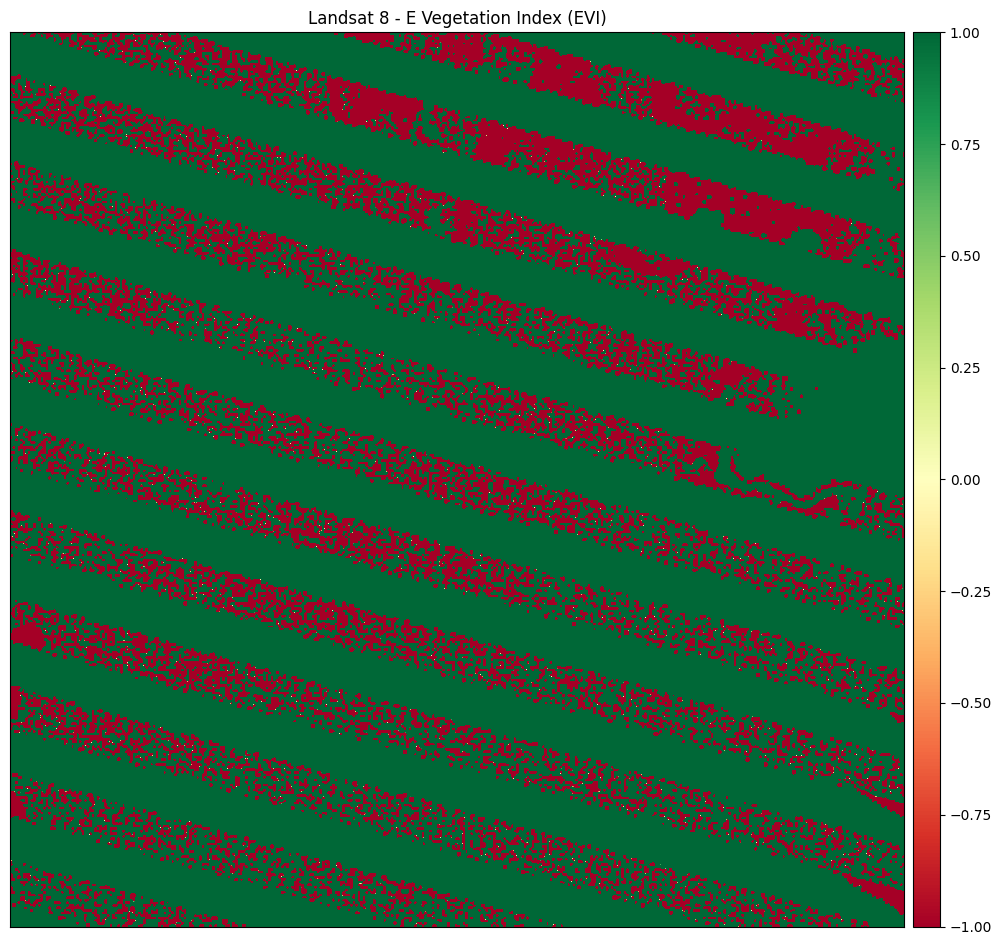

<Axes: title={'center': 'Landsat 8 - E Vegetation Index (EVI)'}>

In [43]:
titles = ["Landsat 8 - E Vegetation Index (EVI)"]

# Turn off bytescale scaling due to float values for NDVI
ep.plot_bands(EVI, cmap="RdYlGn", cols=1, title=titles, vmin=-1, vmax=1)

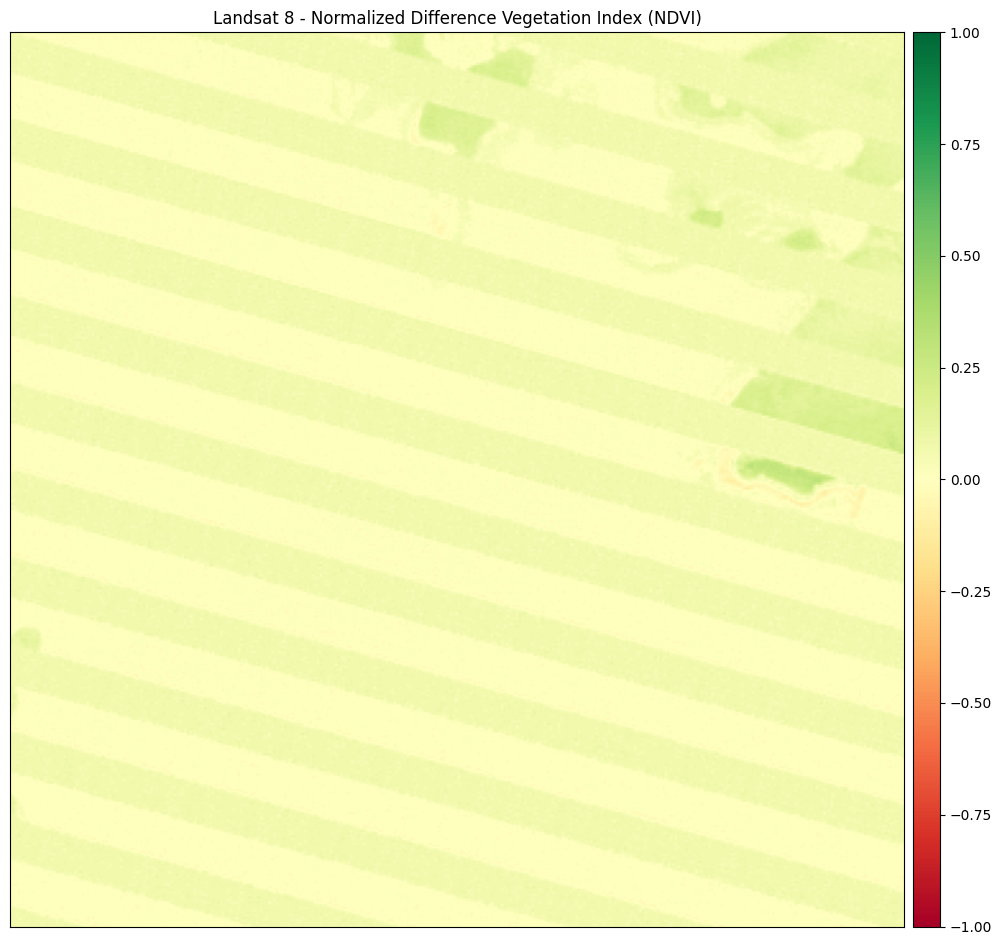

<Axes: title={'center': 'Landsat 8 - Normalized Difference Vegetation Index (NDVI)'}>

In [44]:
titles = ["Landsat 8 - Normalized Difference Vegetation Index (NDVI)"]

# Turn off bytescale scaling due to float values for NDVI
ep.plot_bands(ndvi, cmap="RdYlGn", cols=1, title=titles, vmin=-1, vmax=1)

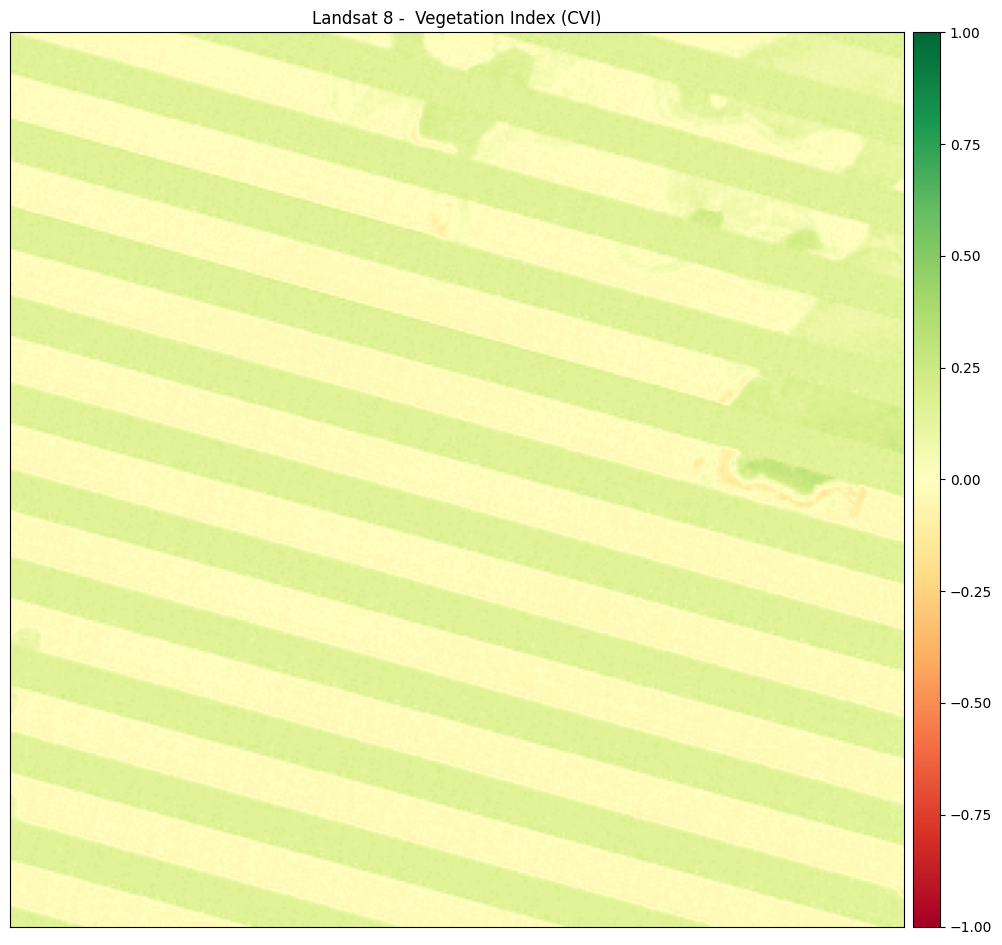

<Axes: title={'center': 'Landsat 8 -  Vegetation Index (CVI)'}>

In [45]:
titles = ["Landsat 8 -  Vegetation Index (CVI)"]

# Turn off bytescale scaling due to float values for EVI
ep.plot_bands(CVI, cmap="RdYlGn", cols=1, title=titles, vmin=-1, vmax=1)

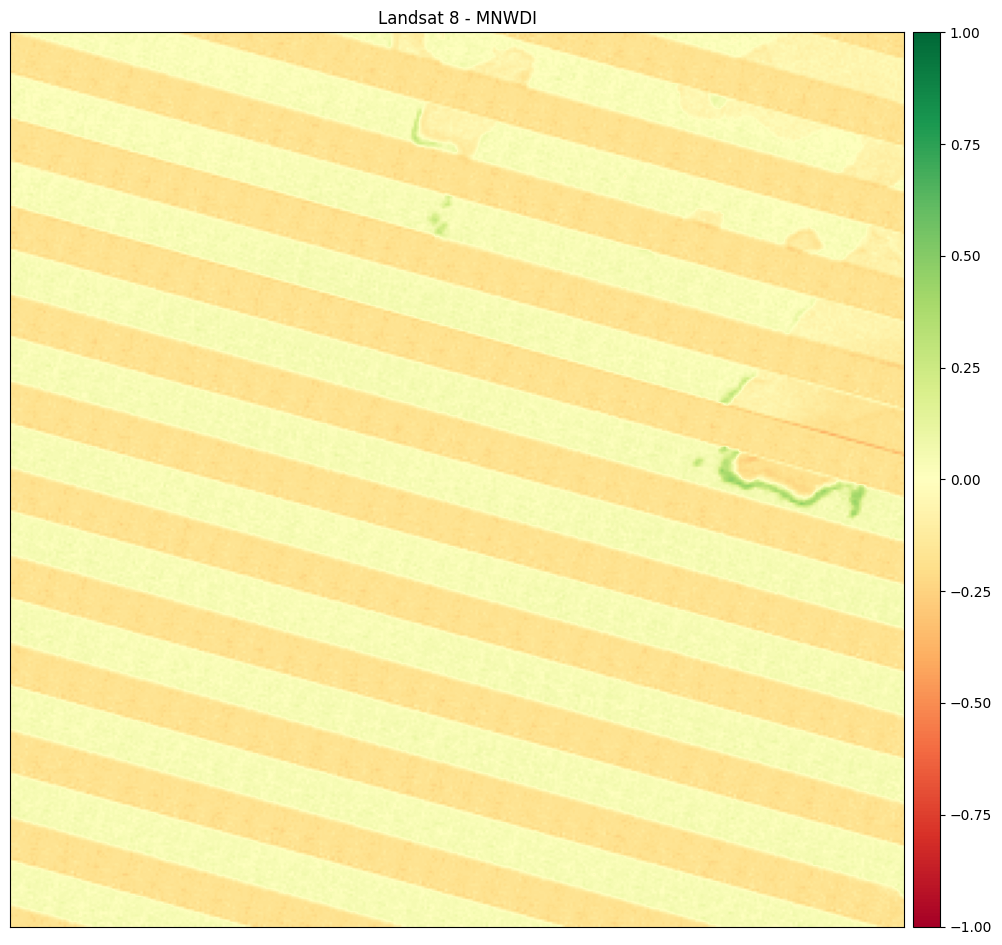

<Axes: title={'center': 'Landsat 8 - MNWDI'}>

In [46]:
titles = ["Landsat 8 - MNWDI"]

# Turn off bytescale scaling due to float values for MNWDI
ep.plot_bands(mndwi, cmap="RdYlGn", cols=1, title=titles, vmin=-1, vmax=1)

In [47]:
# Create classes and apply to NDVI results
EVI_class_bins = [-np.inf, 0, 0.50, 0.75, 0.90, np.inf]    ##### changing
EVI_landsat_class = np.digitize(EVI, EVI_class_bins)      #### https://www.geeksforgeeks.org/python-numpy-np-digitize-method/

# Apply the nodata mask to the newly classified NDVI data
EVI_landsat_class = np.ma.masked_where(
    np.ma.getmask(EVI), EVI_landsat_class
)
np.unique(EVI_landsat_class)

masked_array(data=[1, 5],
             mask=False,
       fill_value=999999)

ValueError: ignored

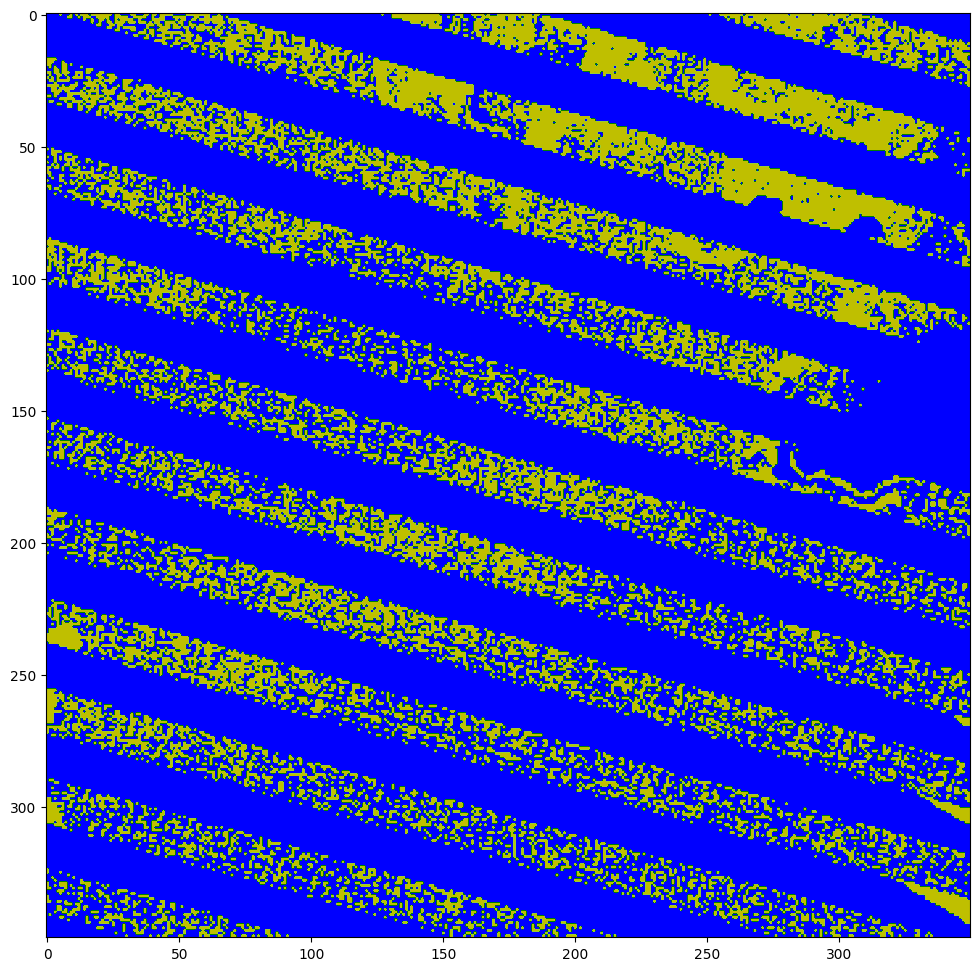

In [48]:
# Define color map
nbr_colors = [ "y", "yellowgreen", "g", "b"]
nbr_cmap = ListedColormap(nbr_colors)

# Define class names
EVI_cat_names = [
    "Bare Area",
    "Low Vegetation",
    "Moderate Vegetation",
    "High Vegetation",
]

# Get list of classes
classes = np.unique(EVI_landsat_class)
classes = classes.tolist()
# The mask returns a value of none in the classes. remove that
classes = classes[0:4]

# Plot your data
fig, ax = plt.subplots(figsize=(12, 12))
im = ax.imshow(EVI_landsat_class, cmap=nbr_cmap)

ep.draw_legend(im_ax=im, classes=classes, titles=EVI_cat_names)
ax.set_title(
    "Landsat 8 - Normalized Difference Vegetation Index (NDVI) Classes",
    fontsize=14,
)
ax.set_axis_off()

# Auto adjust subplot to fit figure size
plt.tight_layout()

In [ ]:
# Create classes and apply to NDVI results
ndvi_class_bins = [-np.inf, 0, 0.1, 0.25, 0.4, np.inf]    ##### changing
ndvi_landsat_class = np.digitize(ndvi, ndvi_class_bins)      #### https://www.geeksforgeeks.org/python-numpy-np-digitize-method/

# Apply the nodata mask to the newly classified NDVI data
ndvi_landsat_class = np.ma.masked_where(
    np.ma.getmask(ndvi), ndvi_landsat_class
)
np.unique(ndvi_landsat_class)

In [ ]:
# Define color map
nbr_colors = [ "y", "yellowgreen", "g", "b"]
nbr_cmap = ListedColormap(nbr_colors)

# Define class names
ndvi_cat_names = [
    "Bare Area",
    "Low Vegetation",
    "Moderate Vegetation",
    "High Vegetation",
]

# Get list of classes
classes = np.unique(ndvi_landsat_class)
classes = classes.tolist()
# The mask returns a value of none in the classes. remove that
classes = classes[0:4]

# Plot your data
fig, ax = plt.subplots(figsize=(12, 12))
im = ax.imshow(ndvi_landsat_class, cmap=nbr_cmap)

ep.draw_legend(im_ax=im, classes=classes, titles=ndvi_cat_names)
ax.set_title(
    "Landsat 8 - Normalized Difference Vegetation Index (NDVI) Classes",
    fontsize=14,
)
ax.set_axis_off()

# Auto adjust subplot to fit figure size
plt.tight_layout()

In [ ]:
# Create classes and apply to NDVI results
CVI_class_bins = [-np.inf, 0, 0.1, 0.25, 0.4, np.inf]    ##### changing
CVI_landsat_class = np.digitize(CVI, CVI_class_bins)

# Apply the nodata mask to the newly classified NDVI data
CVI_landsat_class = np.ma.masked_where(
    np.ma.getmask(CVI), CVI_landsat_class
)
np.unique(CVI_landsat_class)

In [ ]:
# Define color map
nbr_colors = [ "y", "yellowgreen", "g", "b"]
nbr_cmap = ListedColormap(nbr_colors)

# Define class names
CVI_cat_names = [
    "Bare Area",
    "Low Vegetation",
    "Moderate Vegetation",
    "High Vegetation",
]

# Get list of classes
classes = np.unique(CVI_landsat_class)
classes = classes.tolist()
# The mask returns a value of none in the classes. remove that
classes = classes[0:4]

# Plot your data
fig, ax = plt.subplots(figsize=(12, 12))
im = ax.imshow(CVI_landsat_class, cmap=nbr_cmap)

ep.draw_legend(im_ax=im, classes=classes, titles=CVI_cat_names)
ax.set_title(
    "Landsat 8 -  Vegetation Index (CVI) Classes",
    fontsize=14,
)
ax.set_axis_off()

# Auto adjust subplot to fit figure size
plt.tight_layout()

In [ ]:
ndvi.shape

In [ ]:
print(ndvi.min())
print(CVI.min())
print(EVI.min())


In [ ]:
print(ndvi.max())
print(CVI.max())
print(EVI.max())

In [ ]:
print(ndvi.mean())
print(CVI.mean())
print(EVI.mean())

In [ ]:
ep.hist(ndvi)
plt.show()

In [ ]:
ep.hist(CVI)
plt.show()

In [ ]:
ep.hist(EVI)
plt.show()

In [ ]:
import pandas as pd

In [ ]:
flat_ndvi = ndvi.flatten()
flat_CVI = CVI.flatten()
flat_EVI = EVI.flatten()

In [ ]:
df = pd.DataFrame()

In [ ]:
df['ndvi'] = flat_ndvi
df['CVI'] = flat_CVI
df['EVI'] = flat_EVI

In [ ]:
df.describe()

In [ ]:
df.head()

In [ ]:
nd =df[df['ndvi'] > 0.25]
CV=df[df['CVI'] > 0.25]
MV = df[df['CVI'] > 0.75]


In [ ]:
nd[:].value_counts().sum()

In [ ]:
CV[:].value_counts().sum()

In [ ]:
MV[:].value_counts().sum()

In [ ]:
# Create classes and apply to EVI results
EVI_class_bins = [0.75, 0.90, np.inf]    ##### changing
EVI_landsat_class = np.digitize(EVI, EVI_class_bins)      #### https://www.geeksforgeeks.org/python-numpy-np-digitize-method/

# Apply the nodata mask to the newly classified NDVI data
EVI_landsat_class = np.ma.masked_where(
    np.ma.getmask(EVI), EVI_landsat_class
)
np.unique(EVI_landsat_class)

In [ ]:
# Define color map
nbr_colors = [ "y", "yellowgreen", "g", "b"]
nbr_cmap = ListedColormap(nbr_colors)

# Define class names
EVI_cat_names = [
    "Low Vegetation",
    "High Vegetation",
]

# Get list of classes
classes = np.unique(EVI_landsat_class)
classes = classes.tolist()
# The mask returns a value of none in the classes. remove that
classes = classes[0:2]

# Plot your data
fig, ax = plt.subplots(figsize=(12, 12))
im = ax.imshow(ndvi_landsat_class, cmap=nbr_cmap)

ep.draw_legend(im_ax=im, classes=classes, titles=ndvi_cat_names)
ax.set_title(
    "Landsat 8 - E Vegetation Index (EVI) Classes",
    fontsize=14,
)
ax.set_axis_off()

# Auto adjust subplot to fit figure size
plt.tight_layout()

In [ ]:
# Create classes and apply to NDVI results
ndvi_class_bins = [0.25, 0.4, np.inf]    ##### changing
ndvi_landsat_class = np.digitize(ndvi, ndvi_class_bins)      #### https://www.geeksforgeeks.org/python-numpy-np-digitize-method/

# Apply the nodata mask to the newly classified NDVI data
ndvi_landsat_class = np.ma.masked_where(
    np.ma.getmask(ndvi), ndvi_landsat_class
)
np.unique(ndvi_landsat_class)

In [ ]:
# Define color map
nbr_colors = [ "y", "yellowgreen", "g", "b"]
nbr_cmap = ListedColormap(nbr_colors)

# Define class names
ndvi_cat_names = [
    "Low Vegetation",
    "High Vegetation",
]

# Get list of classes
classes = np.unique(ndvi_landsat_class)
classes = classes.tolist()
# The mask returns a value of none in the classes. remove that
classes = classes[0:2]

# Plot your data
fig, ax = plt.subplots(figsize=(12, 12))
im = ax.imshow(ndvi_landsat_class, cmap=nbr_cmap)

ep.draw_legend(im_ax=im, classes=classes, titles=ndvi_cat_names)
ax.set_title(
    "Landsat 8 - Normalized Difference Vegetation Index (NDVI) Classes",
    fontsize=14,
)
ax.set_axis_off()

# Auto adjust subplot to fit figure size
plt.tight_layout()

1426 TEST Satellite images  choosing 5 out of 7 bands

In [ ]:
data_array.shape

In [58]:
def masking(X, Y):

  # masking the array1 by using array2

  mask = np.ma.masked_where(X,Y)

  return mask

In [60]:
import numpy.ma as ma

[0 1]


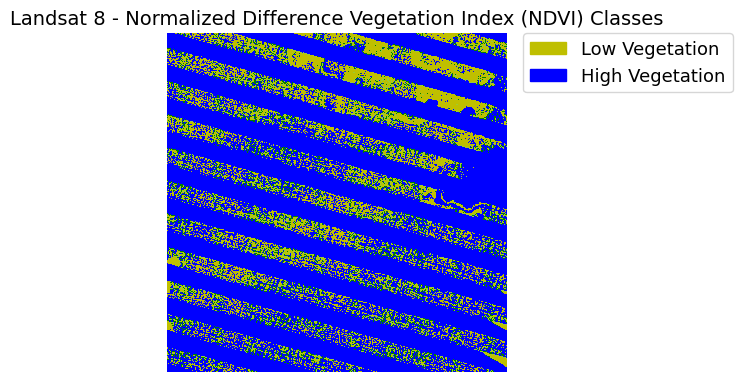

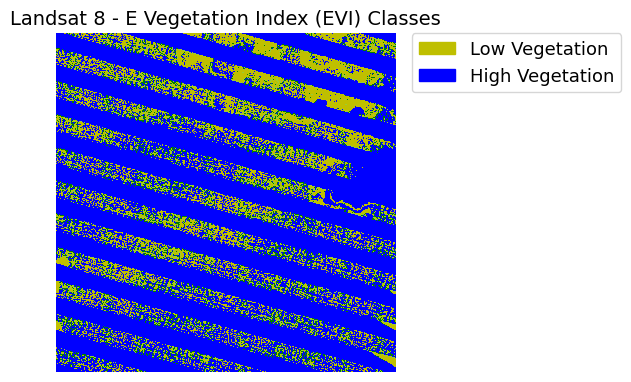

HP480632_satellite1.tif
HP480632_satellite2.tif
HP480632_satellite3.tif
HP480632_satellite4.tif
HP480632_satellite5.tif
HP480632_satellite6.tif
HP480632_satellite7.tif
[0 1]


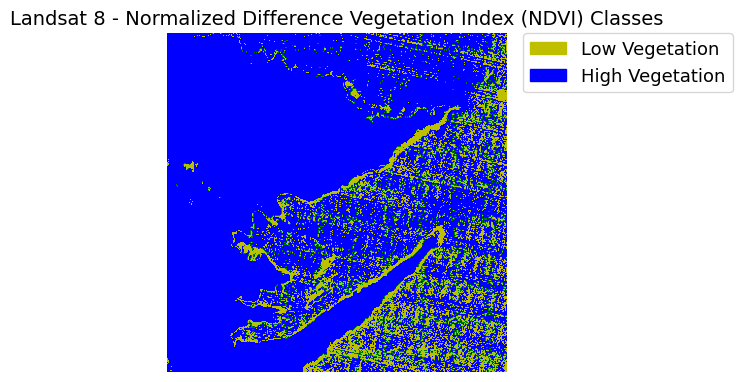

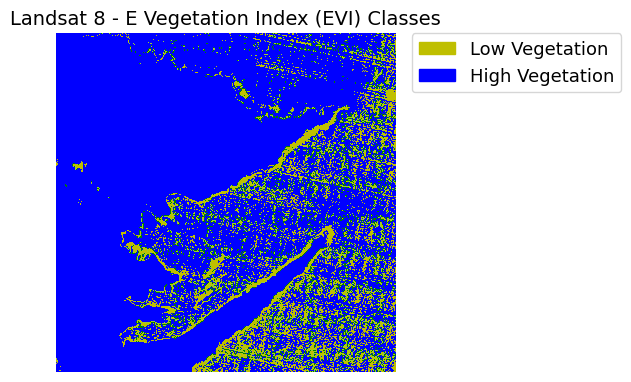

HP504630_satellite1.tif
HP504630_satellite2.tif
HP504630_satellite3.tif
HP504630_satellite4.tif
HP504630_satellite5.tif
HP504630_satellite6.tif
HP504630_satellite7.tif
[0 1]


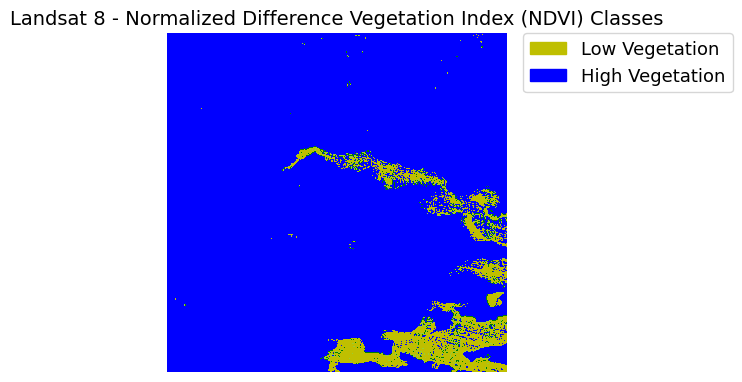

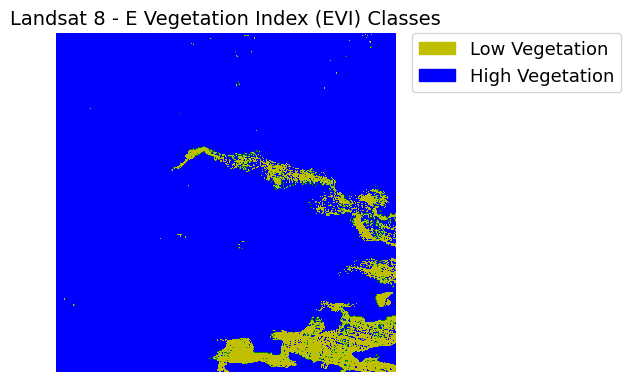

HQ731262_satellite1.tif
HQ731262_satellite2.tif
HQ731262_satellite3.tif
HQ731262_satellite4.tif
HQ731262_satellite5.tif
HQ731262_satellite6.tif
HQ731262_satellite7.tif
[0 1]


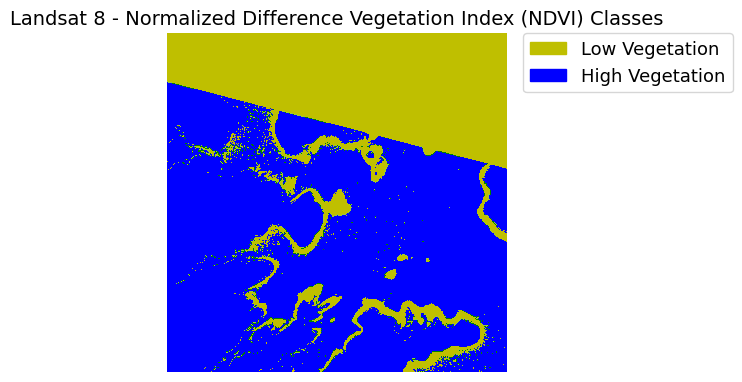

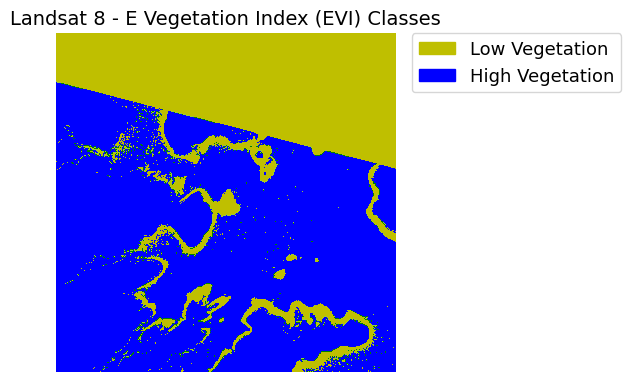

HR677407_satellite1.tif
HR677407_satellite2.tif
HR677407_satellite3.tif
HR677407_satellite4.tif
HR677407_satellite5.tif
HR677407_satellite6.tif
HR677407_satellite7.tif
[0 1]


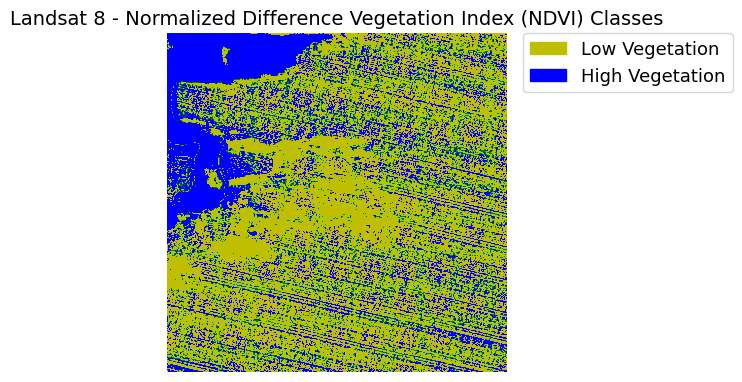

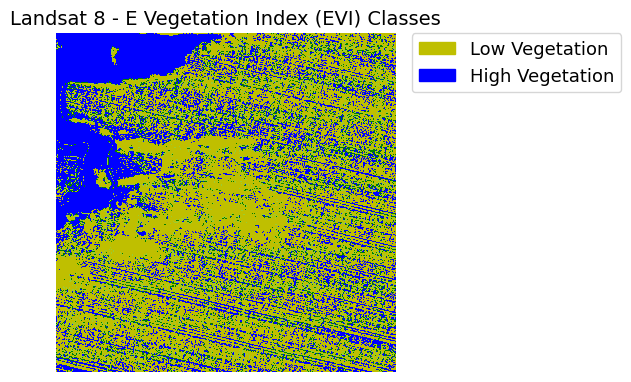

HS330914_satellite1.tif
HS330914_satellite2.tif
HS330914_satellite3.tif
HS330914_satellite4.tif
HS330914_satellite5.tif
HS330914_satellite6.tif
HS330914_satellite7.tif
[0]
[0 1]


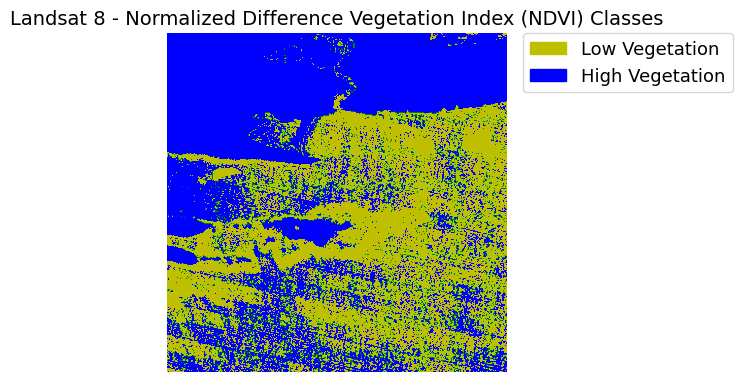

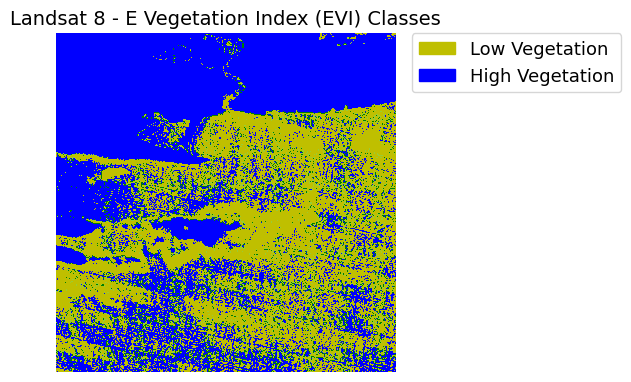

HS439498_satellite1.tif
HS439498_satellite2.tif
HS439498_satellite3.tif
HS439498_satellite4.tif
HS439498_satellite5.tif
HS439498_satellite6.tif
HS439498_satellite7.tif
[0 1]


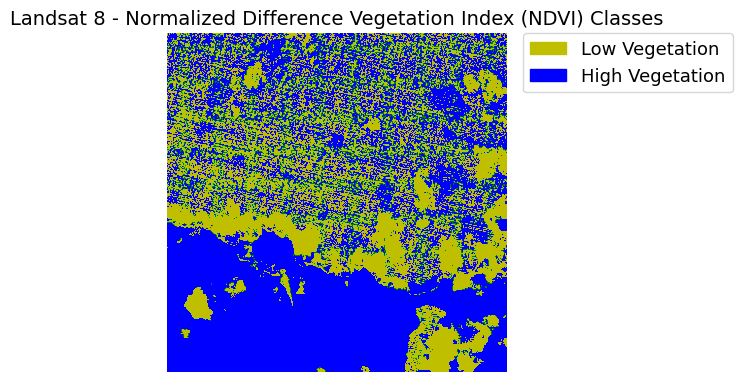

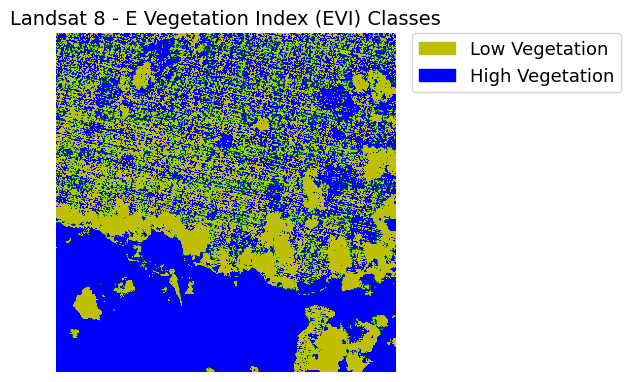

HS536802_satellite1.tif
HS536802_satellite2.tif
HS536802_satellite3.tif
HS536802_satellite4.tif
HS536802_satellite5.tif
HS536802_satellite6.tif
HS536802_satellite7.tif
[0 1]


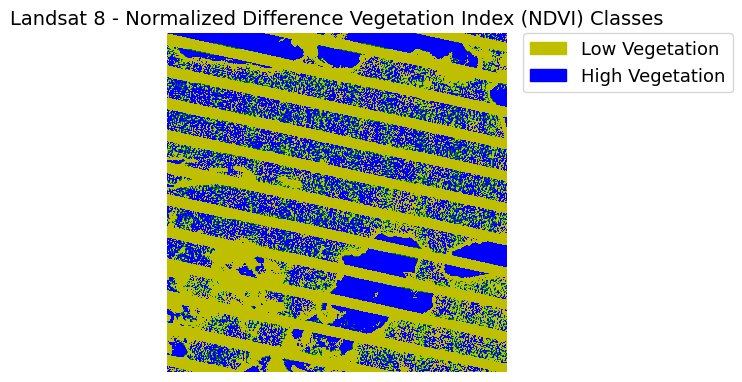

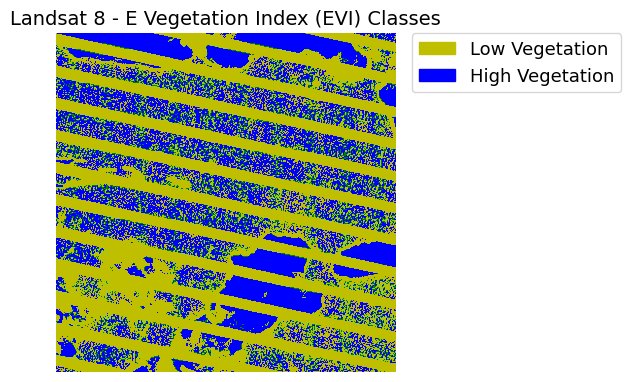

HS571366_satellite1.tif
HS571366_satellite2.tif
HS571366_satellite3.tif
HS571366_satellite4.tif
HS571366_satellite5.tif
HS571366_satellite6.tif
HS571366_satellite7.tif
[0 1]


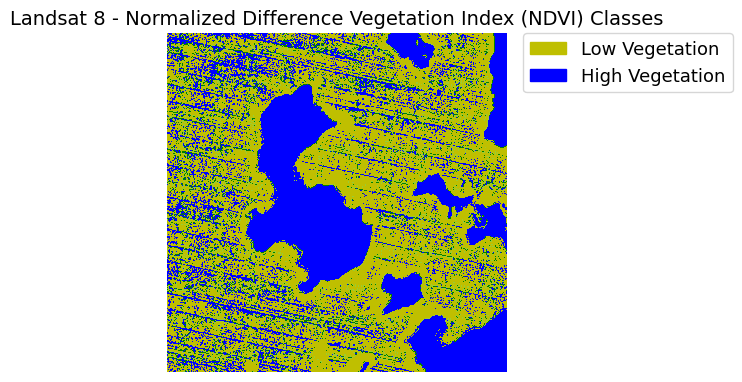

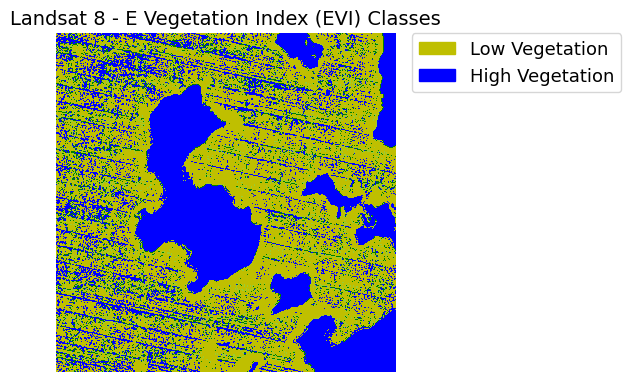

HS646417_satellite1.tif
HS646417_satellite2.tif
HS646417_satellite3.tif
HS646417_satellite4.tif
HS646417_satellite5.tif
HS646417_satellite6.tif
HS646417_satellite7.tif
[0 1]


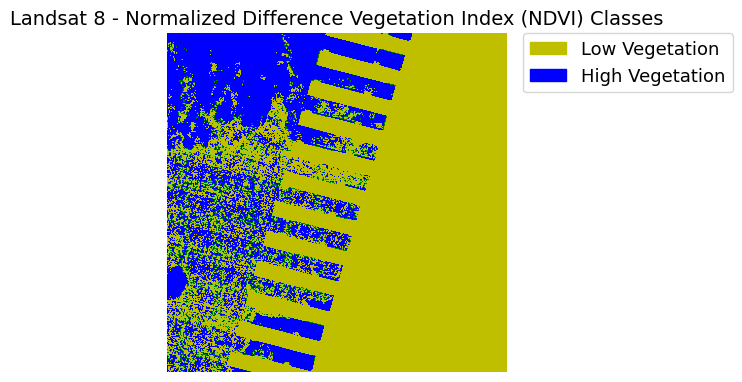

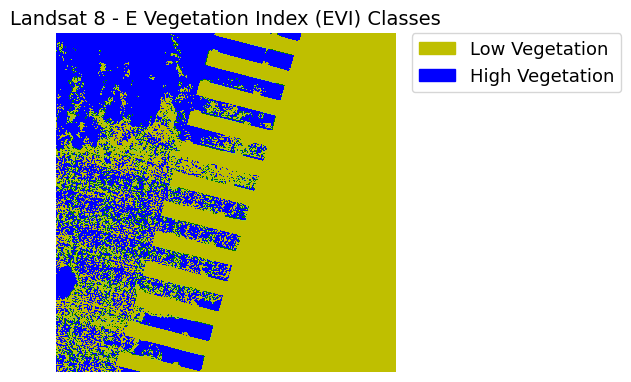

HT224548_satellite1.tif
HT224548_satellite2.tif
HT224548_satellite3.tif
HT224548_satellite4.tif
HT224548_satellite5.tif
HT224548_satellite6.tif
HT224548_satellite7.tif


In [66]:
Rejected_test_satellite_files = []

stop =0
for i in test_files_list:                                  ##### POPULATE all data to data_array with 7 BANDS
  with rasterio.open(test_path+'/'+i) as src:
                                                      ###########
    data_array = src.read([1,2,3,4,5,6,7])
    XXX  = data_array
    SWIR = XXX[0]
    NIR = XXX[1]
    RED = XXX[2]
    GREEN = XXX[3]
    BLUE = XXX[4]
    CLOUD = XXX[5]
    DEM = XXX[6]
    ndvi = es.normalized_diff(NIR,RED)
    mndwi = es.normalized_diff(GREEN,SWIR)
    EVI = GREEN *((NIR -RED)/(NIR + 6*RED - 7.5*BLUE + 1))

    CVI = es.normalized_diff(NIR,GREEN)
    EVI_class_bins = [0.75, 0.90, np.inf]    ##### changing
    EVI_landsat_class = np.digitize(EVI, EVI_class_bins)
    # Apply the nodata mask to the newly classified and NDVI EVI data
    EVI_landsat_class = np.ma.masked_where(
    np.ma.getmask(EVI), EVI_landsat_class)
    np.unique(EVI_landsat_class)


    ndvi_class_bins = [0.25,1]

    # Define class names
    ndvi_cat_names = [
                      "Low Vegetation",
                      "High Vegetation",
                     ]
    ndvi_landsat_class = np.digitize(ndvi, ndvi_class_bins)
    ndvi_landsat_class = np.ma.masked_where(
    np.ma.getmask(ndvi), ndvi_landsat_class
    )
    classes_ndvi = np.unique(ndvi_landsat_class)
    print(classes_ndvi)
    classes_ndvi = classes_ndvi.tolist()
    if(len(classes_ndvi) < 2):
      Rejected_test_satellite_files.append(i)
      continue
    if(len(classes_EVI) < 2):
      Rejected_test_satellite_files.append(i)
      continue
    EVI_cat_names = [
                      "Low Vegetation",
                      "High Vegetation",
                     ]

    classes_EVI = EVI_landsat_class[0:2]
    classes_ndvi = classes_ndvi[0:2]
    fig, ax = plt.subplots(figsize=(6, 6))
    im = ax.imshow(EVI_landsat_class, cmap=nbr_cmap)
    ep.draw_legend(im_ax=im, classes=classes_EVI, titles=EVI_cat_names)
    ax.set_title(
    "Landsat 8 - Normalized Difference Vegetation Index (NDVI) Classes",
    fontsize=14,
    )
    ax.set_axis_off()
    plt.tight_layout()
    plt.show()

    fig, ax = plt.subplots(figsize=(6,6))
    im = ax.imshow(EVI_landsat_class, cmap=nbr_cmap)
    ep.draw_legend(im_ax=im, classes=classes_EVI, titles=EVI_cat_names)
    ax.set_title(
    "Landsat 8 - E Vegetation Index (EVI) Classes",
    fontsize=14,
    )
    ax.set_axis_off()
    plt.tight_layout()
    plt.show()

    EVI_binary  = np.digitize(EVI,EVI_class_bins)
    masked_EVI_binary = masking(EVI,CLOUD)

    NDVI_binary = np.digitize(ndvi, ndvi_class_bins)    ### Masking EVI_binary with CLOUD
    masked_NDVI_binary= masking(NDVI_binary,CLOUD)
    # calling masking function to get
    # masked array
    masked_RED_EVI= masking(RED,masked_EVI_binary)
    masked_GREEN_EVI= masking(GREEN,masked_EVI_binary)
    masked_BLUE_EVI= masking(BLUE,masked_EVI_binary)
    masked_SWIR_EVI= masking(SWIR,masked_EVI_binary)
    masked_NIR_EVI= masking(NIR,masked_EVI_binary)
    masked_CLOUD_EVI= masking(CLOUD,masked_EVI_binary)
    masked_DEM_EVI= masking(DEM,masked_EVI_binary)
    NIR_output_EVI  = ma.getmask(masked_NIR_EVI)
    RED_output_EVI = ma.getmask(masked_RED_EVI)
    GREEN_output_EVI = ma.getmask(masked_GREEN_EVI)
    BLUE_output_EVI = ma.getmask(masked_BLUE_EVI)
    SWIR_output_EVI = ma.getmask(masked_SWIR_EVI)
    CLOUD_output_EVI = ma.getmask(masked_CLOUD_EVI)
    DEM_output_EVI = ma.getmask(masked_DEM_EVI)

    masked_RED= masking(RED,masked_NDVI_binary)       ##### masked_NDVI_binary masking
    masked_GREEN= masking(GREEN,masked_NDVI_binary)
    masked_BLUE= masking(BLUE,masked_NDVI_binary)
    masked_SWIR= masking(SWIR,masked_NDVI_binary)
    masked_NIR= masking(NIR,masked_NDVI_binary)
    masked_CLOUD= masking(CLOUD,masked_NDVI_binary)
    masked_DEM= masking(DEM,masked_NDVI_binary)
    NIR_output  = ma.getmask(masked_NIR)
    RED_output = ma.getmask(masked_RED)
    GREEN_output = ma.getmask(masked_GREEN)
    BLUE_output = ma.getmask(masked_BLUE)
    SWIR_output = ma.getmask(masked_SWIR)
    CLOUD_output = ma.getmask(masked_CLOUD)
    DEM_output = ma.getmask(masked_DEM)

    ####  Writing output files for each band after applying NDVI_binary mask.....
    with rasterio.Env():

      # Write an array as a raster band to a new 8-bit file. For
      # the new file's profile, we start with the profile of the source
      profile = src.profile

      # And then change the band count to 1, set the
      # dtype to uint8, and specify LZW compression.
      profile.update(
        dtype=rasterio.uint8,
        count=1,
        compress='lzw')
      masked_BANDS = [SWIR_output,NIR_output,RED_output,GREEN_output,BLUE_output,CLOUD_output,DEM_output]
      masked_BANDS_EVI = [SWIR_output_EVI,NIR_output_EVI,RED_output_EVI,GREEN_output_EVI,BLUE_output_EVI,CLOUD_output_EVI,DEM_output_EVI]
      for band in range(1,8):
        s = i.split('_')
        ss = s[0] + '_satellite' + str(band) + '.tif'
        print(ss)
        array = masked_BANDS[band-1]
        array_EVI = masked_BANDS_EVI[band-1]
        with rasterio.open('/content/sample_data/temp_KELP/' + ss, 'w', **profile) as dst:
          dst.write(array.astype(rasterio.uint8), 1)
        with rasterio.open('/content/sample_data/temp_EVI_KELP/' + ss, 'w', **profile) as dst:
          dst.write(array_EVI.astype(rasterio.uint8), 1)
      stop = stop +1
      if stop ==10:
        break


In [ ]:
with rasterio.open('/content/drive/MyDrive/KELP_OUTPUT/HP480632_satellite1.tif') as src:
  data = src.read(1)

data


In [ ]:
len(Rejected_test_satellite_files)     ####   Test Satellite images without NDVI >=25

In [ ]:
selected_files_using_NDVI = os.listdir('/content/drive/MyDrive/KELP_OUTPUT')

In [ ]:
len(selected_files_using_NDVI)

In [ ]:
path = '/content/drive/MyDrive/KELP submission after NDVI'

In [ ]:
first_try = os.listdir(path)

In [ ]:
for i in first_try:
  with rasterio.open(path+'/'+i) as src:
    data_array = src.read()
    show(data_array)

In [ ]:
NDVI_df = pd.DataFrame()
NDVI_df['NDVI'] = ndvi.flatten()
NDVI_df['NDVI_class'] = NDVI_binary.flatten()
NDVI_df.head()

In [ ]:
NDVI_df['NDVI_class'].value_counts()

In [ ]:
NDVI_df.describe()

In [ ]:
NDVI_masked_with_cloud = np.ma.masked_where(
    np.ma.getmask(CLOUD), NDVI_binary)


In [ ]:
show(NDVI_masked_with_cloud)

In [ ]:
show(NDVI_binary)

In [ ]:
NDVI_df['NDVI_with_cloud_mask'] = NDVI_masked_with_cloud.flatten()
NDVI_df.head()

In [ ]:
NDVI_df['NDVI_with_cloud_mask'].value_counts()

In [ ]:
NDVI_df['NDVI_class'].value_counts()

RED with NDVI masking

In [ ]:
RED

In [ ]:
def masking(RED, NDVI_binary):

  # masking the array1 by using array2
  # where array2 mod 7 is true
  mask = np.ma.masked_where(NDVI_binary,RED)

  return mask

In [ ]:
# calling masking function to get
  # masked array
masked_RED= masking(RED,NDVI_binary)

  # getting the values as 1-d array which
  # are non masked
#masked_RED = np.ma.compressed(masked_RED)

  # printing the values
print(masked_RED)

In [ ]:
NDVI_df['RED'] = RED.flatten()
NDVI_df['RED_with_NDVI_mask']= masked_RED.flatten()
NDVI_df.head()

In [ ]:
show(RED)

In [ ]:
show(masked_RED)

In [ ]:
def masking(NDVI_binary,CLOUD):

  # masking the array1 by using array2
  # where array2 mod 7 is true
  mask = np.ma.masked_where(NDVI_binary,CLOUD)

  return mask

In [ ]:
masked_NDVI_binary= masking(NDVI_binary,CLOUD)

  # getting the values as 1-d array which
  # are non masked
#masked_RED = np.ma.compressed(masked_RED)

In [ ]:
show(NDVI_binary)

In [ ]:
show(masked_NDVI_binary)

In [ ]:

                            ##### POPULATE all data to data_array with 7 BANDS
with rasterio.open(test_path +'/'+ 'VZ260940_satellite.tif') as src:
                                                      ###########
    data_array = src.read([1,2,3,4,5,6,7])
    XXX  = data_array
    SWIR = XXX[0]
    NIR = XXX[1]
    RED = XXX[2]
    GREEN = XXX[3]
    BLUE = XXX[4]
    CLOUD = XXX[5]
    DEM = XXX[6]
    ndvi = es.normalized_diff(NIR,RED)
    mndwi = es.normalized_diff(GREEN,SWIR)
    CVI = es.normalized_diff(NIR,GREEN)
    ndvi_class_bins = [0.25,1]
    ndvi_landsat_class = np.digitize(ndvi, ndvi_class_bins)
    ndvi_landsat_class = np.ma.masked_where(
    np.ma.getmask(ndvi), ndvi_landsat_class
    )
    classes = np.unique(ndvi_landsat_class)
    print(classes)
    classes = classes.tolist()

    classes = classes[0:2]
    fig, ax = plt.subplots(figsize=(12, 12))
    im = ax.imshow(ndvi_landsat_class, cmap=nbr_cmap)
    ep.draw_legend(im_ax=im, classes=classes, titles=ndvi_cat_names)
    ax.set_title(
    "Landsat 8 - Normalized Difference Vegetation Index (NDVI) Classes",
    fontsize=14,
    )
    ax.set_axis_off()
    plt.tight_layout()
    plt.show()

    NDVI_binary = np.digitize(ndvi, ndvi_class_bins)    ### Masking NDVI_binary with CLOUD
    masked_NDVI_binary= masking(NDVI_binary,CLOUD)
    # calling masking function to get
    # masked array
    masked_RED= masking(RED,NDVI_binary)
    masked_GREEN= masking(GREEN,NDVI_binary)
    masked_BLUE= masking(BLUE,NDVI_binary)
    masked_SWIR= masking(SWIR,NDVI_binary)
    masked_NIR= masking(NIR,NDVI_binary)
    masked_CLOUD= masking(CLOUD,NDVI_binary)
    masked_DEM= masking(DEM,NDVI_binary)





In [ ]:
show(masked_SWIR)

In [ ]:
masked_SWIR

In [ ]:
masked_SWIR.shape

In [ ]:
import numpy.ma as ma

In [ ]:
ma.getmask(masked_SWIR)   #### to get masked array

In [ ]:
SWIR

Clustering with k=25

In [ ]:
                            ##### POPULATE all data to data_array with 7 BANDS
with rasterio.open(test_path +'/'+ 'VZ260940_satellite.tif') as src:
                                                      ###########
    data_array = src.read([1,2,3,4,5,6,7])
    XXX  = data_array
    SWIR = XXX[0]
    NIR = XXX[1]
    RED = XXX[2]
    GREEN = XXX[3]
    BLUE = XXX[4]
    CLOUD = XXX[5]
    DEM = XXX[6]

In [ ]:
####    https://www.acgeospatial.co.uk/k-means-sentinel-2-python/

In [ ]:
img = masked_SWIR
X = img.reshape((-1,1))

In [ ]:
X.shape

In [ ]:
import numpy as np
from sklearn import cluster

In [ ]:
k_means = cluster.KMeans(n_clusters=5)
k_means.fit(X)

X_cluster = k_means.labels_
X_cluster = X_cluster.reshape(img.shape)

In [ ]:
plt.figure(figsize=(20,20))
plt.imshow(X_cluster, cmap="hsv")
plt.show()

In [ ]:
X_cluster

In [ ]:
X_cluster.shape

In [ ]:
X_cluster.max()

In [ ]:
X_cluster.min()

In [ ]:
plt.figure(figsize=(20,20))
plt.imshow(X_cluster)
plt.show()

USE K means to verify NDVI based predicted images....


In [ ]:
Predicted_by_NDVI_path = '/content/drive/MyDrive/SUBMIT_NOW'

In [ ]:
Predicted_by_NDVI = os.listdir(Predicted_by_NDVI_path)

In [ ]:
len(Predicted_by_NDVI)

In [ ]:
Predicted_by_NDVI[0:7]

In [ ]:
Rejected_by_K_Means = []
Accepted_by_K_Means = []
stop=0
for i in Predicted_by_NDVI:
  with rasterio.open(Predicted_by_NDVI_path +'/'+ i) as src:
    data_array = src.read(1)
    print(data_array)
    show(data_array)
    X = data_array.reshape((-1,1))

    k_means = cluster.KMeans(n_clusters=25)
    k_means.fit(X)
    X_cluster = k_means.labels_
    X_cluster = X_cluster.reshape(data_array.shape)
    print(i)
    plt.figure(figsize=(20,20))
    plt.imshow(X_cluster, cmap="hsv")
    plt.show()
    stop+=1
    print(X_cluster.max())
    print(X_cluster.min())
    if(X_cluster.max() > 20):
      Rejected_by_K_Means.append(i)
    else:
      Accepted_by_K_Means.append(i)
      print("Accepted")
    if stop==200:
      break




In [ ]:
Rejected_by_K_Means

In [ ]:
Accepted_by_K_Means

Find optimal value of K

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.cluster import KMeans


In [ ]:
for i in Predicted_by_NDVI:
  with rasterio.open(Predicted_by_NDVI_path +'/'+ i) as src:
    data_array = src.read(1)
    show(data_array)
    X = data_array.reshape((-1,1))
    cost =[]
    for i in range(1, 11):
      KM = KMeans(n_clusters = i, max_iter = 500)
      KM.fit(X)

    # calculates squared error
    # for the clustered points
      cost.append(KM.inertia_)

# plot the cost against K values
    plt.plot(range(1, 11), cost, color ='g', linewidth ='3')
    plt.xlabel("Value of K")
    plt.ylabel("Squared Error (Cost)")
    plt.show() # clear the plot
    break

# the point of the elbow is the
# most optimal value for choosing k

In [ ]:
train_KELP_file_path = '/content/drive/MyDrive/train_kelp/AA498489_kelp.tif'

In [ ]:
with rasterio.open(train_KELP_file_path) as src:
    data_array = src.read(1)
    show(data_array)
    X = data_array.reshape((-1,1))

In [ ]:
data_array